<a href="https://colab.research.google.com/github/jarrodsb/DSPS_JBieber/blob/main/HW5/Solutions_hacking_PI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pylab as pl
#!pip install astropy
import astropy
from astropy import units as u


%pylab inline

# Additional Imports
import random


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.12/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['isin', 'square', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Derive empirically the value of $\pi$ knwoing that the ratio of the area of the square and the inscribed circle is π / 4.



In [35]:
def square(l, ax):
  ax.plot([-l, l], [-l, -l], 'k-')
  ax.plot([-l, l], [l, l], 'k-')
  ax.plot([-l, -l], [-l, l], 'k-')
  ax.plot([l, l], [-l, l], 'k-')


In [36]:
def circle(l, ax):
  theta = np.linspace(0, 360, 100)
  theta *= u.degree
  x = l * np.cos(theta.to(u.rad))
  y = l * np.sin(theta.to(u.rad))
  ax.plot(x, y, 'k-')


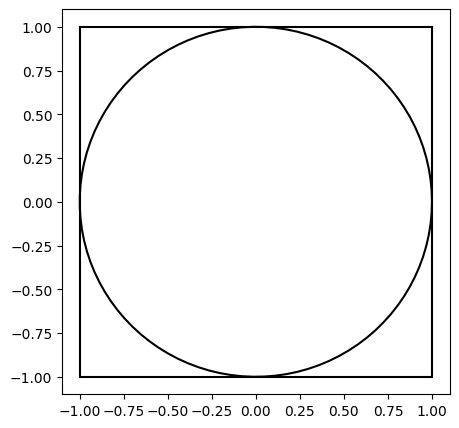

In [37]:
fig, ax = pl.subplots(figsize=(5, 5))
square(1, ax=ax)
circle(1, ax=ax)

In [38]:
# define a function that determins if a random point in the square is inside or outside of the circle
def isin(x, y, l):
  if np.hypot(x, y) < l: # Compares the hypotenuse of x and y to a circle of radius l
    return True
  else:
    return False

In [39]:
isin(0.71, 0.71, 1)

False

In [40]:
# draw a bunch coordinates (x,y) inside the suqre. how many?
# remember what to do before starting the random calls
def drawPoints(numPoints, boundary):

  fig, ax = pl.subplots(figsize=(5, 5))
  square(1, ax=ax)
  circle(1, ax=ax)

  xCoords = []
  yCoords = []

  random.seed(28)  # Any integer value, makes sure we can reproduce the same random points

  for i in range(numPoints):
    randX = random.uniform(-boundary,boundary) # Random x value within the boundaries of the square
    randY = random.uniform(-boundary,boundary) # Random y value within the boundaries of the square
    xCoords.append(randX) # Add the random point's x coordinate to the list
    yCoords.append(randY) # Add the random point's y coordinate to the list

  ax.scatter(xCoords, yCoords, color='red', marker='o', s=30)

  return xCoords, yCoords

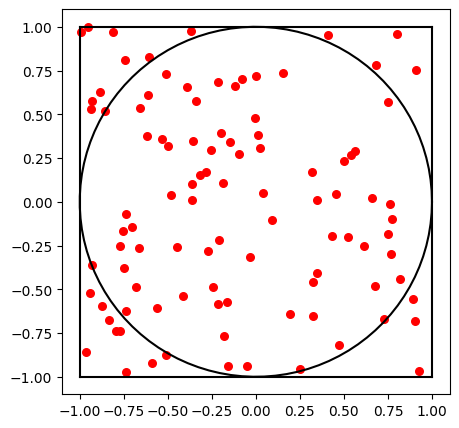

In [41]:
drawPoints(100, 1);

In [42]:
# what is the ratio of points in and out of the circle? can you get to pi from it?
def ratio(numPoints, boundary):

  xCoords, yCoords = drawPoints(numPoints, boundary)

  numIn = 0
  numOut = 0

  for i in range(numPoints):
    if isin(xCoords[i], yCoords[i], boundary):
      numIn += 1
    else:
      numOut += 1

  total = numIn + numOut
  ratioIn = numIn / total
  ratioOut = numOut / total

  print(f"There are {numIn} points inside the circle out of {total}. The ratio is {ratioIn}.")
  print(f"There are {numOut} points outside the circle out of {total}. The ratio is {ratioOut}.")

There are 74 points inside the circle out of 100. The ratio is 0.74.
There are 26 points outside the circle out of 100. The ratio is 0.26.


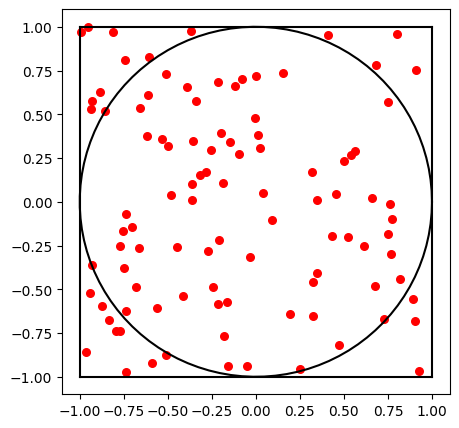

In [43]:
ratio(100, 1)

The inscribed circle covers about 75% of the square's area. We have $\frac{\text{Area of Circle}}{\text{Area of Square}} = 0.75 = \frac{\pi}{4}$ , so $\pi = \left(0.75\right)\left(4\right) = 3$ ... Okay maybe we would need more points to make the empirically derived value of $\pi$ more accurate, but you get the idea.